# Fully Connected vs. Convolutional Neural Networks

## Refs 

[1] https://www.tensorflow.org/install

[2] https://www.tensorflow.org/tutorials/keras/classification
    

In [1]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping,TensorBoard
import matplotlib.pyplot as plt
import numpy as np

## Sequential Neural Network

In [2]:
def show_history(history):
    print(history.history.keys())

    # summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


def show_images(rows, cols, data, labels):

    width= 3 * rows
    height= 3 * cols

    f, axes= plt.subplots(rows,cols,figsize=(height,width))
    fig=plt.figure()

    for a in range(rows*cols):
        b = data[a]
        subplot_title=("class "+str(labels[a]))
        axes.ravel()[a].set_title(subplot_title)  
        axes.ravel()[a].imshow(data[a, :, :, 0], cmap='gray')
    fig.tight_layout()    
    plt.show()


In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)

x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

print(x_train.shape, x_train.shape)

(60000, 28, 28, 1) (60000, 28, 28, 1)


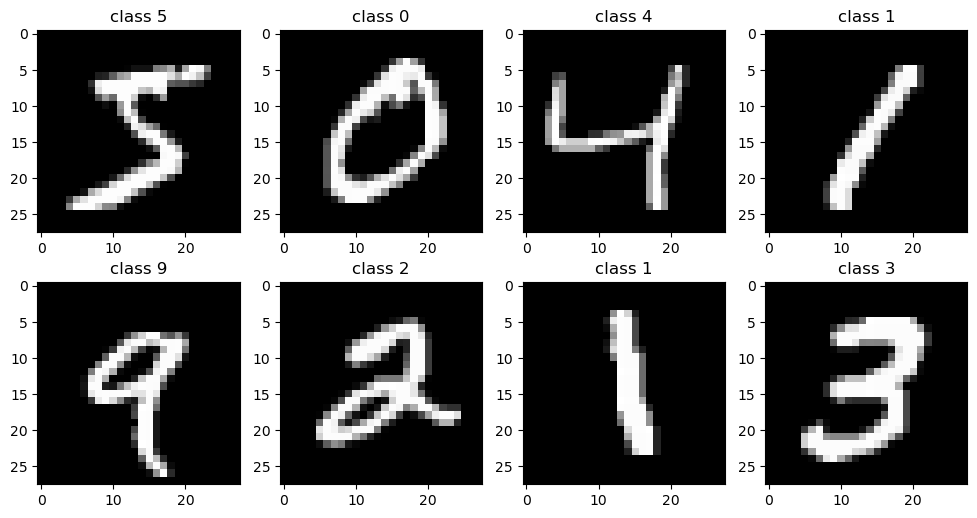

<Figure size 640x480 with 0 Axes>

In [6]:
show_images(2, 4, x_train, y_train)

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 2.4062 - accuracy: 0.0807


[2.406212091445923, 0.08070000261068344]

In [10]:
history = model.fit(x_train, y_train, batch_size=32, epochs=28, validation_split=0.2)

Epoch 1/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2205 - accuracy: 0.9334 - val_loss: 0.1109 - val_accuracy: 0.9662
Epoch 2/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0914 - accuracy: 0.9723 - val_loss: 0.1431 - val_accuracy: 0.9581
Epoch 3/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0629 - accuracy: 0.9804 - val_loss: 0.1024 - val_accuracy: 0.9703
Epoch 4/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0455 - accuracy: 0.9853 - val_loss: 0.0979 - val_accuracy: 0.9735
Epoch 5/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0364 - accuracy: 0.9883 - val_loss: 0.1016 - val_accuracy: 0.9744
Epoch 6/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0294 - accuracy: 0.9904 - val_loss: 0.1116 - val_accuracy: 0.9718
Epoch 7/28
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 0.1201 - val_accuracy:

In [11]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1547 - accuracy: 0.9820


[0.15473449230194092, 0.9819999933242798]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


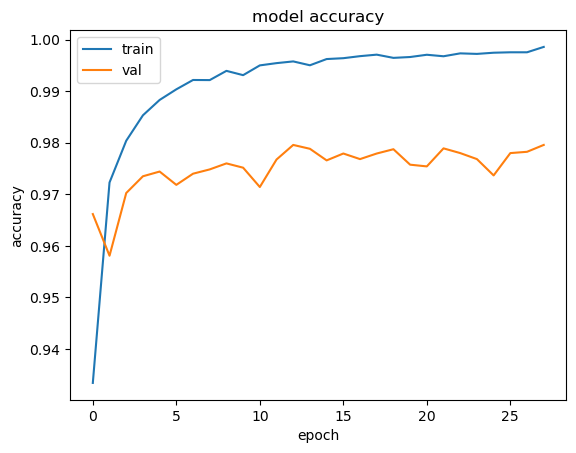

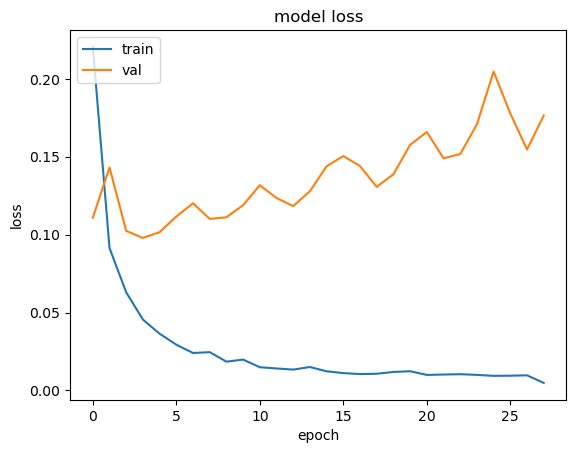

In [12]:
show_history(history)

In [13]:
best_epoch = np.argmax(history.history['val_accuracy'])

print("Best epoch score ->", best_epoch, "epoch")

Best epoch score -> 12 epoch


In [14]:
file_path = 'Best_Model_Sequential'

check_pointer_Seq = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True)
early_stopper_Seq = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, verbose=1)
tbCallback_Seq    = TensorBoard(log_dir='logSeq', histogram_freq=0, write_graph=True, write_images=True)

In [15]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model2.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[check_pointer_Seq, early_stopper_Seq, tbCallback_Seq])

Epoch 1/100
   1/1500 [..............................] - ETA: 0s - loss: 2.3301 - accuracy: 0.0938WARNING:tensorflow:From c:\Users\Utilizador\anaconda3\envs\tf-gpu-cuda8\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1495/1500 [============================>.] - ETA: 0s - loss: 0.2232 - accuracy: 0.9327
Epoch 00001: val_accuracy improved from -inf to 0.96508, saving model to Best_Model_Sequential
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2227 - accuracy: 0.9328 - val_loss: 0.1157 - val_accuracy: 0.9651
Epoch 2/100
1492/1500 [============================>.] - ETA: 0s - loss: 0.0910 - accuracy: 0.9726
Epoch 00002: val_accuracy improved from 0.96508 to 0.97125, saving model to Best_Model_Sequential
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0915 - accuracy: 0

In [17]:
model2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1390 - accuracy: 0.9791


[0.1390237659215927, 0.9790999889373779]

In [18]:
model2.load_weights(file_path)

In [19]:
model2.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1052 - accuracy: 0.9807


[0.10518670827150345, 0.9807000160217285]

In [20]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


## Convolutional Neural Networks

In [21]:
def createConvModel():
    modelConv = tf.keras.Sequential()
    modelConv.add(tf.keras.layers.Input(shape=(28,28,1)))
    modelConv.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
    modelConv.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
    modelConv.add(tf.keras.layers.Flatten())
    modelConv.add(tf.keras.layers.Dense(32, activation='relu'))
    modelConv.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    modelConv.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return modelConv
    
modelConv = createConvModel()

print(modelConv.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 16)        2320      
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 32)                294944    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                330       
Total params: 297,754
Trainable params: 297,754
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
file_path = 'Best_Model_Convolutional'

check_pointer_Conv = ModelCheckpoint(filepath=file_path, monitor='val_accuracy', verbose=1, save_weights_only=True, save_best_only=True)
early_stopper_Conv = EarlyStopping(monitor='val_accuracy', min_delta=0.00001, patience=8, verbose=1)
tbCallback_Conv    = TensorBoard(log_dir='logConv', histogram_freq=0, write_graph=True, write_images=True)

In [23]:
history = modelConv.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[check_pointer_Conv, early_stopper_Conv, tbCallback_Conv])

Epoch 1/100
1871/1875 [============================>.] - ETA: 0s - loss: 0.1504 - accuracy: 0.9540
Epoch 00001: accuracy improved from -inf to 0.95410, saving model to Best_Model_Convolutional
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1502 - accuracy: 0.9541
Epoch 2/100
1874/1875 [============================>.] - ETA: 0s - loss: 0.0519 - accuracy: 0.9840
Epoch 00002: accuracy improved from 0.95410 to 0.98400, saving model to Best_Model_Convolutional
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 3/100
1870/1875 [============================>.] - ETA: 0s - loss: 0.0359 - accuracy: 0.9886
Epoch 00003: accuracy improved from 0.98400 to 0.98862, saving model to Best_Model_Convolutional
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0358 - accuracy: 0.9886
Epoch 4/100
1875/1875 [==============================] - ETA: 0s - loss: 0.0261 - accuracy: 0.9914
Epoch 00004: accuracy improved from 0.9

dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

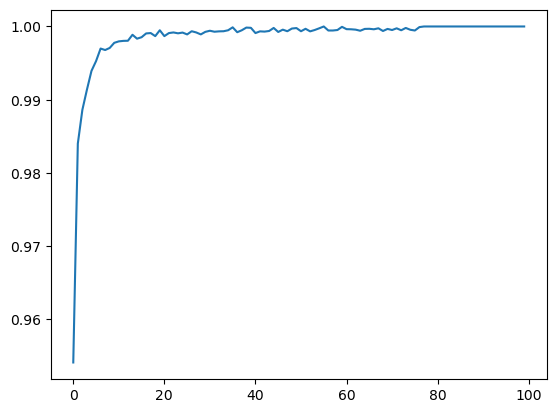

In [24]:
show_history(history)

In [ ]:
modelConv.evaluate(x_test, y_test, verbose=2)

## Create new modelm load the weights and evaluate

In [ ]:
m = createConvModel()

m.load_weights(file_path)
m.evaluate(x_test, y_test, verbose=2)

## Visualizing the convolution layers

Check the layers in the model:

In [ ]:
for layer in modelConv.layers:
    print(layer.name)

Build a model with all the conv layers as outputs

In [ ]:
# Extract the outputs of the top 2 layers
layer_output = [layer.output for layer in modelConv.layers[:2]]
# Build new model
activation_model = tf.keras.models.Model(inputs=modelConv.input, outputs=layer_output)

activation_model.summary()

tf.keras.utils.plot_model(activation_model, "img1", show_shapes=True)

In [ ]:
activations = activation_model.predict(np.asarray([x_test[0]]))

first_layer_activation = activations[0]
print(first_layer_activation.shape)

second_layer_activation = activations[1]
print(second_layer_activation.shape)

Show activation of the 3rd filter on the second convolutional layer

In [ ]:
plt.matshow(second_layer_activation[0, :, :, 2], cmap='red')

Show all activations

In [ ]:
layer_names = [layer.name for layer in activation_model.layers]
print(layer_names)

for layer_n, layer_a in zip(layer_names[1:], activations):
    filters = layer_a.shape[-1]
    labels = [layer_n + ' ' + str(i) for i in range(filters)]
    images = np.swapaxes(layer_a[0], 2, 0) # filters as first dimension
    images = np.swapaxes(images, 1, 2) # swap x and y
    images = images[..., None] # add extra dimension at end
    print(images.shape)
    show_images(2, 8, images, labels)